# HW1. 근찾기 그래프
이번 과제는 matplotlib와 numpy모듈을 활용하여 자성체의 온도에 따른 상전이현상을 이분법과 뉴턴방법을 통해 시각화하는것을 목표로 한다.


A. $y=m$, $y=\tanh(\frac{m}{T/T_c})$ 각각을 자화도 $m$의 함수로 그리세요. (단, $T=T_c/2$) [10pts]

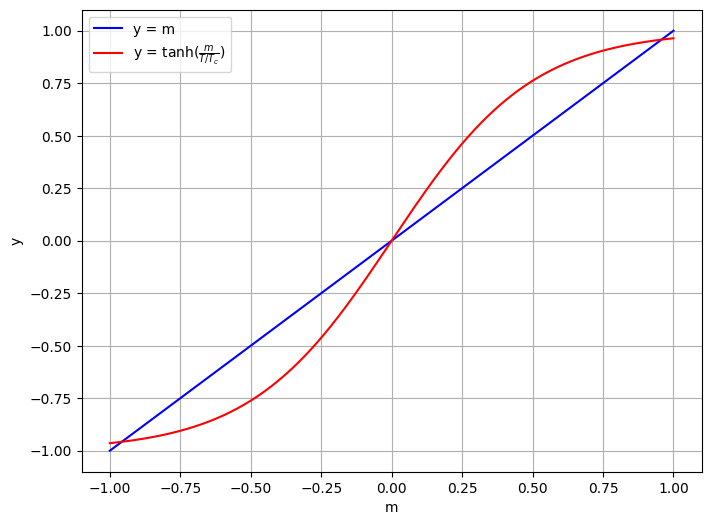

In [20]:
import numpy as np
import matplotlib.pyplot as plt

Tc = 1
T = Tc / 2
m_values = np.linspace(-1, 1, 4000)

y_linear = m_values
y_tanh = np.tanh(m_values / (T / Tc))

plt.figure(figsize=(8, 6))
plt.plot(m_values, y_linear, label='y = m', color='blue')
plt.plot(m_values, y_tanh, label=r'y = tanh($\frac{m}{T/T_c}$)', color='red')

plt.xlabel('m')
plt.ylabel('y')
plt.legend()

plt.grid(True)
plt.show()

변수 $T_c$를 임의의 값인 1을 통해 선언하였으며, 문제에 주어진 관계식을 바탕으로 변수 $T$를 선언하였다. $-1 \leq m \leq 1$의 범위에서 그래프를 작성하였으며, $y=m$의 그래프를 파란색으로, $y=\tanh(\frac{m}{T/T_c})$의 그래프는 빨간색으로 나타내었다. 위의 그래프를 통해 두 함수는 $T = T_c/2$의 조건 하에서 총 3개의 교점을 가진다는 사실을 알 수 있다.

B. 이 식을 이용해서 자화도 $m$을 이분법으로 찾아 온도  $T$의 함수로 그리세요. ($m = 0$ 제외하고 양수인 근을 찾아보세요.) [30pts]

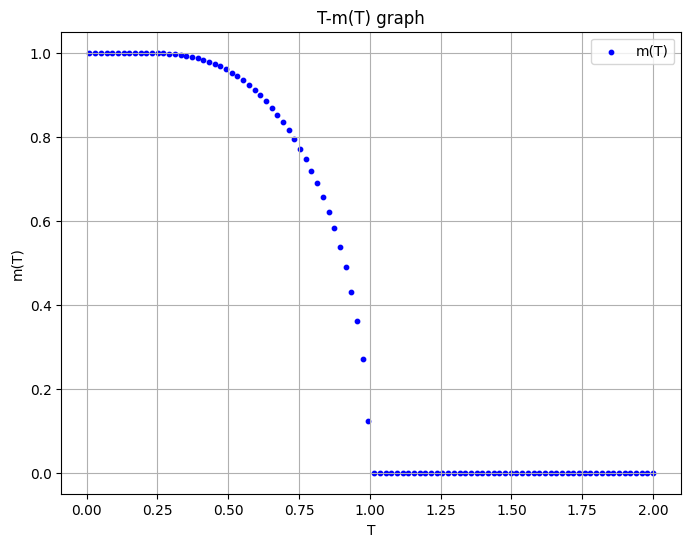

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Tc = 1
T_values = np.linspace(0.01, 2 * Tc, 100)
eps = 1E-8

def f(m, T):
    return np.tanh(m / (T / Tc)) - m

def bisection(T):
    m1 = 0.1
    m2 = 1.1
    m3_list = []
    list1 = []
    while (m2 - m1) > eps:
        m3 = (m1 + m2) / 2.0
        if f(m1, T) * f(m3, T) < 0.0:
            m2 = m3
        else:
            m1 = m3

        m3_list.append(m3)

    for i in m3_list:
        if f(m2, T) * f(i, T) < 0.0:
          list1.append(0)
        else:
          list1.append(1)
    if all(list1):
      m3 = 0

    return m3

m_values = [bisection(T) for T in T_values]

plt.figure(figsize=(8, 6))
plt.scatter(T_values, m_values, label='m(T)', color='blue', s=10)

plt.xlabel('T')
plt.ylabel('m(T)')
plt.title('T-m(T) graph')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()

plt.grid(True)
plt.show()


위 코드는 **이분법(Bisection Method)**을 활용해 $T$값에 따른 방정식 $m = \tanh(\frac{m}{T/T_c})$ 의 근을 찾고, 그 값을 그래프로 시각화한 코드이다. 위 그래프에서 $x$축의 값은 $T_c$를 기준으로 $T$의 값을 변화시킨 것을 나타내며, 따라서 $0 \leq T \leq 2T_c$의 범위를 가진다. \\
리스트 T_values는 0.01부터 2 * Tc까지 100개의 온도 값으로 이루어진 배열로, 각 온도에서의 m의 값을 계산할 때 사용된다.이분법의 경우 오차 허용범위에 따라 찾게될 근의 정확도가 결정된다. 본 코드에서는 오차 허용범위를 나타내는 변수 eps의 값을 $10^{−8}$ 으로 설정하였다. 사용자 정의 함수 f(m, t)는 $\tanh(\frac{m}{T/T_c})-m$으로 정의하였으며, 이후 이분법을 통해 T 값에 따른 m값을 구하게 된다. \\
사용자 정의 함수 bisection(T)는 이분법을 통해 특정온도 T에서의 m의 근을 구하는 함수로서, 임의의 함수의 근을 찾기위해 이분법을 사용하는 경우 $f(m_1)f(m_2)<0$ 인 임의의 $m_1$ 과 $m_2$ 를 정해야하는데, 본 코드에선 문제 (a)에서의 결과를 바탕으로 m1=0.1, m2= 1 로 지정하였다. 리스트 m3_list는 이분법의 각 단계에서 구해진 근의 값을 저장하는 리스트이다. 본 문제에서는 양수근을 구하는것이 목표이므로 만약 주어진 T의 값에서 양수근이 존재하지 않는 경우, 근이 존재하지 않음을 나타내는 코드가 추가로 필요하다. \\
본 코드에서는 이 문제를 이분법의 특성을 활용하여 해결하고자 하였다. 이분법은 m1과 m2의 중간값인 m3가 $f(m_1)f(m_3)<0$을 만족하는가를 통해 근의 범위를 줄여나간다. 따라서 만약 m1과 m2 사이에 근이 존재하지 않는경우, $f(m_1)f(m_3)$값이 항상 양수라는 점을 이용하여 m3_list에 들어있는 모든 값들에 대해 $f(m_1)f(m_3)$의 값이 양수이면 1, 0 또는 음수이면 0을 삽입한 리스트를 만들어 리스트의 모든 원소의 값이 1이면 양수근이 없다고 판단하여 m3의 값을 0으로 설정 하였다. \\
위의 그래프를 통해  $0 < T < T_c$에서는 $m$의 값이 점점 줄어들다가 $T > T_c$인 경우 $m$의 값이 0이 된다는 사실을 알 수 있다.

C. 이 식을 이용해서 자화도 $m$을 뉴턴 방법으로 찾아 온도  $T$의 함수로 그리세요. [30pts]

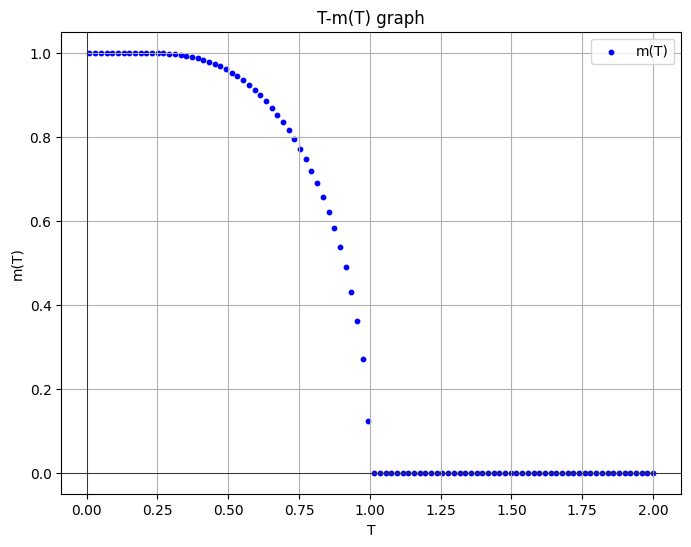

In [16]:
import numpy as np
import matplotlib.pyplot as plt

Tc = 1
T_values = np.linspace(0.01, 2 * Tc, 100)
eps = 1E-8

def f(m, T):
    return np.tanh(m / (T / Tc)) - m

def df(m, T):
  return (f(m+eps, T)-f(m, T))/eps

def newton(T):
    m=1
    while(np.abs(f(m, T)) > eps):
      m -= f(m, T)/df(m, T)
    return m

m_values = [newton(T) for T in T_values]


plt.figure(figsize=(8, 6))
plt.scatter(T_values, m_values, label='m(T)', color='blue', s=10)

plt.xlabel('T')
plt.ylabel('m(T)')
plt.title('T-m(T) graph')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()

plt.grid(True)
plt.show()

위 코드는 **뉴턴 방법(Newton's Method)**을 활용해 $T$값에 따른 방정식 $m = \tanh(\frac{m}{T/T_c})$ 의 근을 찾고, 그 값을 그래프로 시각화한 코드이다. 위 그래프에서 $x$축의 값은 $T_c$를 기준으로 $T$의 값을 변화시킨 것을 나타내며, 따라서 $0 \leq T \leq 2T_c$의 범위를 가진다. \\
리스트 T_values는 0.01부터 2 * Tc까지 100개의 온도 값으로 이루어진 배열로, 각 온도에서의 m의 값을 계산할 때 사용된다.뉴턴 방법의 경우 $f(x_n)$의 절댓값 크기의 범위에 따라 찾게될 근의 정확도가 결정된다. 본 코드에서는 오차 허용범위를 나타내는 변수 eps의 값을 $10^{−8}$ 으로 설정하였다. \\
사용자 정의 함수 f(m, t)는 $\tanh(\frac{m}{T/T_c})-m$으로 정의하였으며, 사용자 정의 함수 $df(m, t)$는 뉴턴-랩슨 방법의 공식에 필요한 $f(m, t)$의 도함수 $f^{'}(m, t)$를 의미한다. 본 함수에서는 미리 선언해놓은 변수 eps를 이용해 근사적으로 도함수의 값을 구하도록 하였다. \\
사용자 정의 함수 newton(T)는 뉴턴 방법을 통해 특정온도 T에서의 m의 근을 구하는 함수로서, 초깃값 m은 1로 가정하였으며 while문 반복을 통해 $f(m, t)$의 절댓값이 eps보다 작아질 때 까지 뉴턴 방법을 반복하도록 하는 함수이다. \\
위의 그래프를 통해  $0 < T < T_c$에서는 $m$의 값이 점점 줄어들다가 $T > T_c$인 경우 $m$의 값이 0이 된다는 사실을 알 수 있다.

D. $T = T_c/2$일 때 이분법과 뉴턴 방법 중에 어떤 방법이 근이 빠르게 수렴하는지 그래프로 그려서 확인해보세요. [20pts]

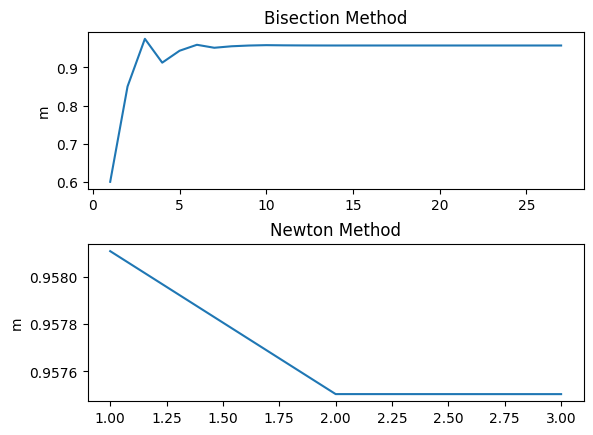

In [19]:
import numpy as np
import matplotlib.pyplot as plt

Tc = 1
T = Tc / 2
eps = 1E-8

def f(m):
    return np.tanh(m / (T / Tc)) - m

def df(m):
  return (f(m+eps)-f(m))/eps

steps1 = []
m3_list = []
m1 = 0.1
m2 = 1.1
step1 = 1

while ((m2-m1)>eps):
  m3=(m1+m2)/2.0
  if f(m1)*f(m3)<0.0:
    m2=m3
  else:
    m1=m3

  steps1.append(step1)
  m3_list.append(m3)
  step1 += 1

m = 1
steps2 = []
m_list = []
step2 = 1

while(np.abs(f(m)) > eps):
  m -= f(m)/df(m)

  steps2.append(step2)
  m_list.append(m)
  step2 += 1

plt.subplot(211)
plt.plot(steps1, m3_list)
plt.ylabel("m")
plt.title('Bisection Method')

plt.subplot(212)
plt.plot(steps2, m_list)
plt.ylabel("m")
plt.title('Newton Method')
plt.subplots_adjust(hspace=0.35)

plt.show()


위의 코드는 $T = T_c/2$일 때 이분법과 뉴턴방법의 근의 수렴과정을 나타낸 그래프를 작성하는 코드이다. 초기 변수설정은 문제 A, B, C에서 선언한것과 동일하게 설정하였으며, 이분법 과정에서 리스트 steps1은 각 단계의 인덱스를 저장하는 리스트이며, 리스트 m3_list는 각 단계에서 계산된 근의 값을 저장하는 리스트이다. while문을 통해 m2와 m1의 차이가 eps보다 작아질 때 까지 이분법을 반복하도록 하였으며, 각 루프마다 그 중간값 m3를 m3_list에 저장하며, step1을 1씩 증가시키도록 하였다. \\
뉴턴 방법도 이분법과 비슷하게 리스트 steps2은 각 단계의 인덱스를 저장하는 리스트이며, 리스트 m_list는 각 단계에서 계산된 근의 값을 저장하는 리스트이다. while문을 통해 $f(m)$의 절댓값이 eps보다 작아질 때까지 뉴턴 방법을 반복하도록 하였으며, 각 루프마다 m값을 m_list에 저장하며, step2를 1씩 증가시키도록 하였다. \\

위 그래프의 결과를 통해 이분법을 통해 해를 구하는 경우에는 해를 구하기 위해 약 20여번의 시행을 거쳐야 원하는 정확도의 근이 도출되며, 뉴턴 방법을 통해 해를 구하는 과정에서는 약 3번의 시행을 거쳐야 원하는 정확도의 근이 도출된다는 사실을 알 수 있었다. 이를 통해 이분법과 뉴턴 방법 중 뉴턴 방법이 이분법보다 빠르게 근을 수렴시켜 나간다는 사실을 알 수 있었다.

E. 사실 이 방정식은 특정 온도 구간에서만 유한한 자화도 $m$을 갖습니다. 해당 구간을
찾고, 특정 온도 구간에서만 자화도 $m$을 갖는 것이 실제 자성체에서 무슨 의미인지 설명해보세요. (문제에 답이 있어요.) [10pts]



이전 문제들을 통해 주어진 방정식 $m=\tanh(\frac{m}{T/T_c})$은 $0 < T < T_c$ 구간에서만 유한한 자화도 $m$을 가진다는 결과를 도출해낼 수 있다. 이처럼 특정 온도구간에서만 자화도 $m$을 갖는다는 것은 현실세계에서 실제 자성체가 임계온도 $T_c$를 넘어가는 높은 온도에 노출된 경우에 자성을 잃는 상전이 현상을 의미한다.